In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import FunctionTransformer
from shapely.geometry import Point

In [2]:
df = gpd.read_file("../../data/lsms/processed/_all_real.csv")
df = df[df.lat != "0.0"]
df = df[df.lon != "0.0"]
crs = {"init": "epsg:4326"}
geometry = [Point(xy) for xy in zip(pd.to_numeric(df.lon), pd.to_numeric(df.lat))]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)
geo_df["cons_pc"] = pd.to_numeric(geo_df["cons_pc"])

/Users/emmaboehly/programmation/anaconda3/envs/poverty_ML/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [3]:
def get_shape(country):
    shape_df = gpd.read_file(f"../../data/country_shapes/{country}.zip")
    return shape_df

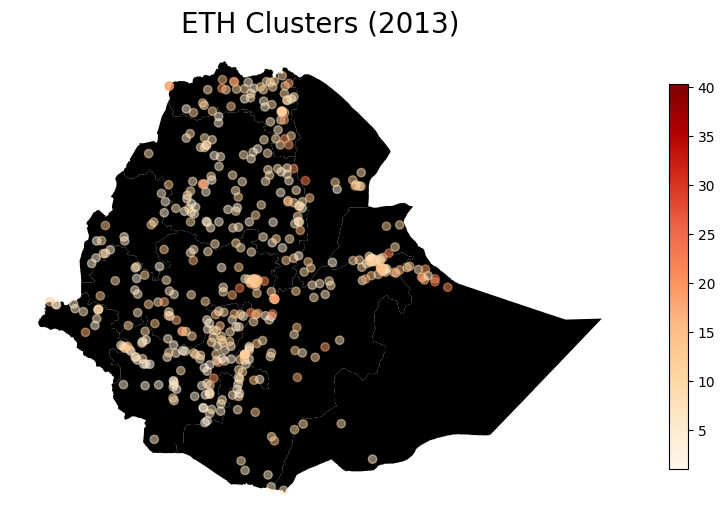

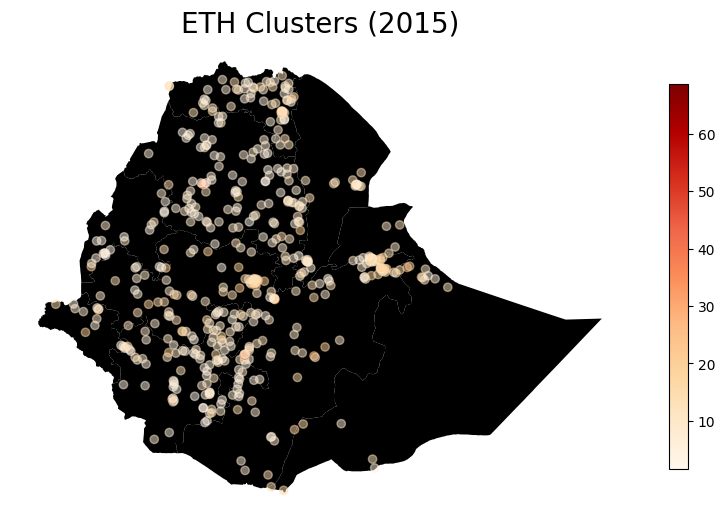

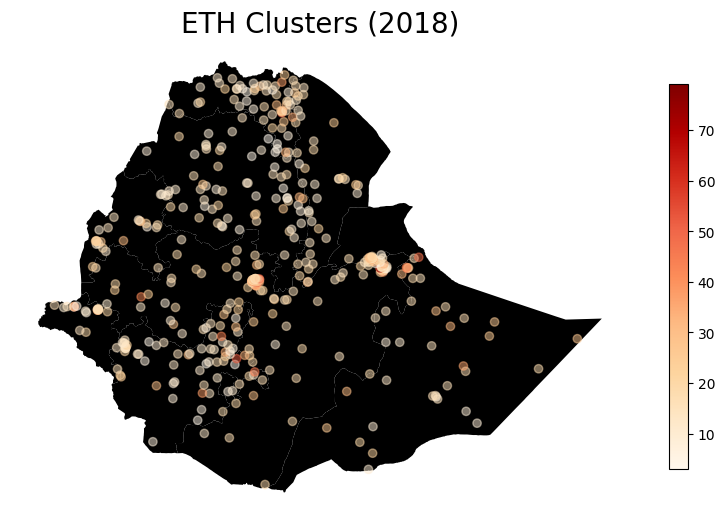

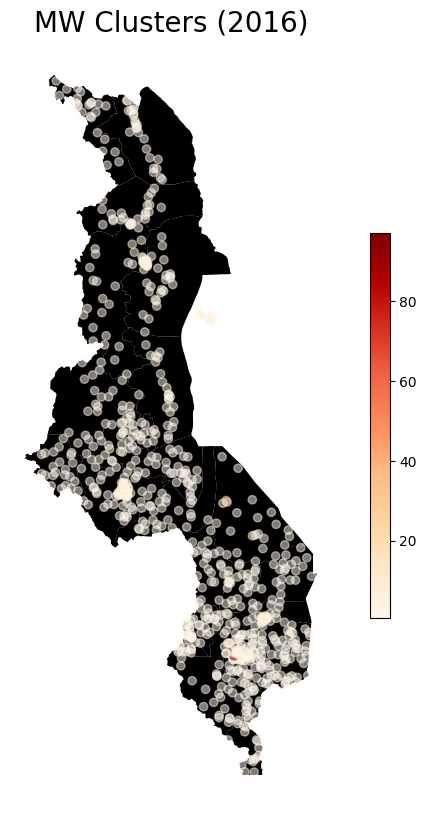

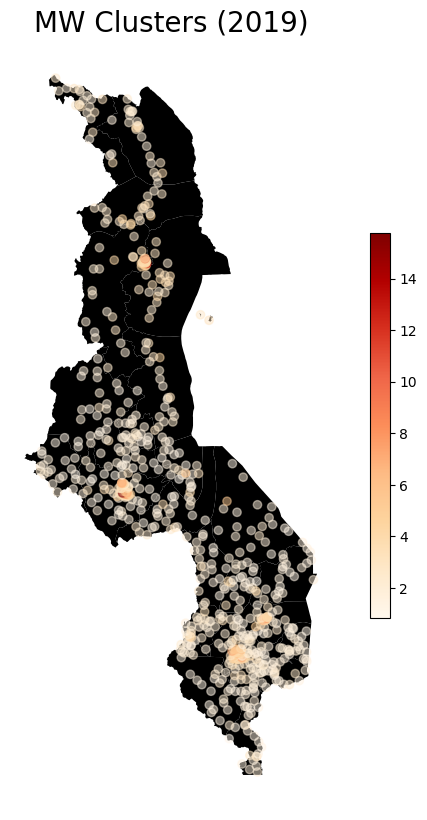

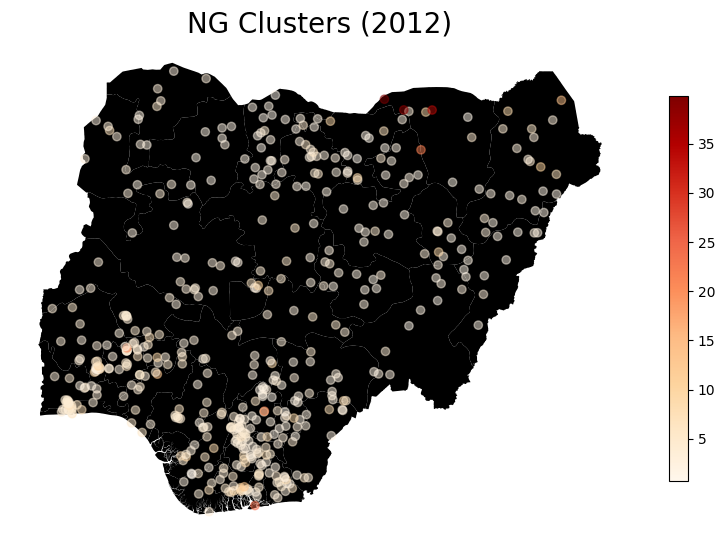

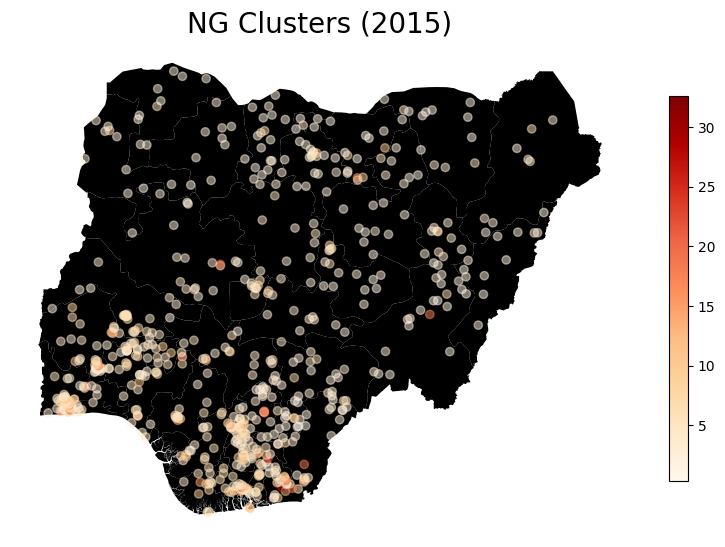

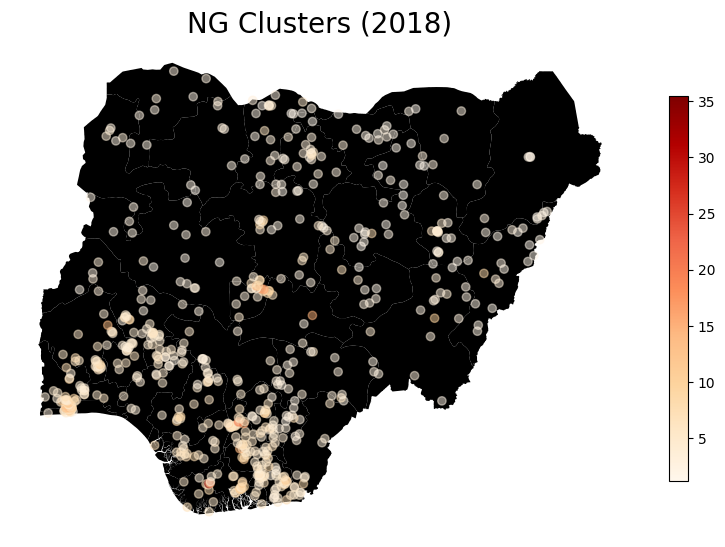

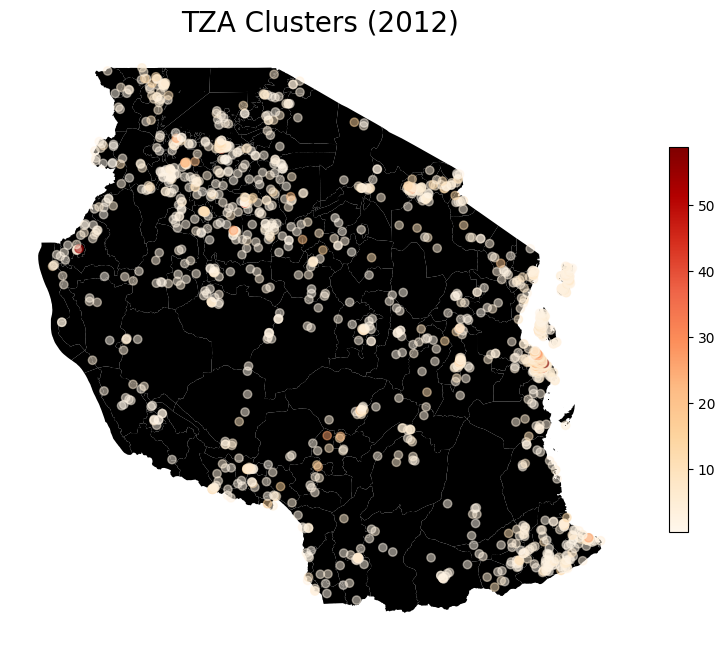

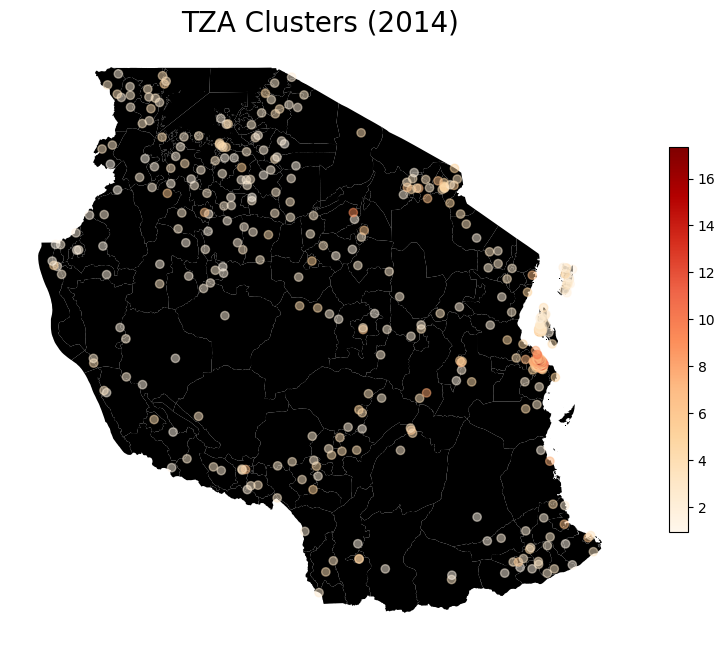

In [4]:
countries = df.groupby(["country"]).groups.keys()
for country in countries:
    shape = get_shape(country)
    tmp_df = df.loc[df.country == country]
    years = tmp_df.groupby(["year"]).groups.keys()
    for year in years:
        year_df = tmp_df.loc[tmp_df.year == year]
        fig, ax = plt.subplots(figsize = (10,10))
        ax.axis("off")
        ax.set_title(f"{country} Clusters ({year})", fontsize=20)
        shape.to_crs(epsg=4326).plot(ax=ax, color="black")
        year_df.plot(column="cons_pc", ax=ax, cmap = "OrRd", alpha = .5, legend = True, legend_kwds={"shrink": 0.5})
        fig.savefig(f"../../figs/{country}_{year}_clusters.pdf", bbox_inches="tight", dpi=600)